<a href="https://colab.research.google.com/github/tarabelo/PIAC-2526/blob/main/Problemas_QUBO_y_modelo_Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 11.2 MB/s eta 0:00:00


# Introducción a los Problemas de Optimización

Muchos problemas relevantes en ciencia, ingeniería, economía o inteligencia artificial pueden expresarse como **problemas de optimización**. En términos generales, un problema de optimización consiste en encontrar los valores de ciertas variables que **minimizan** o **maximizan** una **función objetivo**, respetando una serie de **restricciones**.

Formalmente, un problema de optimización puede escribirse como:

$$
\begin{aligned}
\text{Minimizar (o maximizar)} \quad & f(x_1, x_2, \dots, x_n) \\
\text{sujeto a} \quad & g_i(x_1, \dots, x_n) \leq 0, \quad i = 1, \dots, m \\
& h_j(x_1, \dots, x_n) = 0, \quad j = 1, \dots, p
\end{aligned}
$$

donde:
- $f$ es la función objetivo,
- $g_i$ son restricciones de desigualdad,
- $h_j$ son restricciones de igualdad,
- y las variables $x_k$ pueden ser reales, enteras, binarias o discretas.

## Ejemplos clásicos de problemas de optimización

- **Problema del viajante (TSP)**: Dado un conjunto de ciudades y las distancias entre ellas, encontrar el camino más corto que visite cada ciudad exactamente una vez y regrese al punto de origen.

- **Problema de la mochila (Knapsack)**: Dados objetos con un peso y un valor, seleccionar un subconjunto cuyo peso total no exceda una capacidad dada y cuyo valor total sea máximo.

- **Coloración de grafos**: Asignar colores a los nodos de un grafo de forma que nodos adyacentes no compartan color y se minimice el número total de colores utilizados.

- **Problema de satisfacibilidad booleana (SAT)**: Determinar si existe una asignación de valores booleanos a un conjunto de variables que satisfaga una fórmula lógica.

- **Programación lineal binaria/entera**: Optimizar una función lineal sujeta a restricciones lineales, donde las variables sólo pueden tomar valores/enteros.

Muchos de estos problemas son [**NP-duros**](https://es.wikipedia.org/wiki/NP-hard), es decir, su complejidad crece exponencialmente con el tamaño del problema.


<details>
<summary>Resumen sobre las clases de complejidad computacional</summary>

Cuando hablamos de la **complejidad computacional** de un problema, nos referimos a la cantidad de recursos (tiempo y/o espacio) necesarios para resolverlo en función del tamaño de la entrada. Esto se formaliza mediante **clases de complejidad**, que agrupan problemas según los recursos requeridos por sus algoritmos.

## Clases principales

### 🔹 P (Polynomial Time)
- Conjunto de problemas que pueden resolverse en **tiempo polinómico** por una máquina determinista.
- Es decir, existen algoritmos eficientes que resuelven el problema con un coste $O(n^k)$, para alguna constante $k$.
- **Ejemplo**: ordenamiento de una lista, búsqueda en un grafo no ponderado.

### 🔹 NP (Nondeterministic Polynomial Time)
- Problemas cuya solución puede **verificarse** en tiempo polinómico, aunque no sepamos cómo **encontrarla** eficientemente.
- Incluye todos los problemas de P (es decir, $\text{P} \subseteq \text{NP}$).
- **Ejemplo**: SAT, TSP, coloreado de grafos, problema de la mochila.

### 🔹 NP-completo
- Subconjunto de NP que incluye los problemas **más difíciles** de la clase.
- Un problema es NP-completo si:
  1. Pertenece a NP.
  2. Todo problema en NP puede reducirse a él en tiempo polinómico.
- Si se resuelve uno en tiempo polinómico, **todos los problemas de NP también se pueden resolver eficientemente**.
- **Ejemplo**: SAT (el primer problema demostrado como NP-completo), 3-COLOR, TSP en su versión de decisión (determinar si existe un camino menor o igual que un valor dado).

### 🔹 NP-duro (NP-hard)
- Problemas **al menos tan difíciles** como los NP-completos, pero **no necesariamente pertenecen a NP** (por ejemplo, pueden no tener soluciones verificables en tiempo polinómico).
- Suelen ser problemas de optimización o de decisión más generales.
- **Ejemplo**: versión de optimización del TSP (encontrar el camino más corto), QUBO, etc.

## ¿P = NP?

La pregunta de si $\text{P} = \text{NP}$ es uno de los problemas abiertos más importantes de la informática teórica. Si se demuestra que $\text{P} = \text{NP}$, todos los problemas cuya solución se puede verificar eficientemente también podrían **resolverse** eficientemente, lo que tendría enormes implicaciones en criptografía, planificación, diseño automático, etc.

---

## Clases de complejidad cuántica

### 🔹 BQP (Bounded-error Quantum Polynomial Time)
- Problemas que pueden resolverse en **tiempo polinómico por una computadora cuántica** con un error de probabilidad acotado (< 1/3).
- Es la **contraparte cuántica de P**, e incluye algunos problemas que no se sabe cómo resolver eficientemente con algoritmos clásicos.
- **Ejemplo**: factorización de enteros (algoritmo de Shor), logaritmo discreto, simulación de sistemas cuánticos.

$$
\text{P} \subseteq \text{BPP} \subseteq \text{BQP}
$$

Donde **BPP** (Bounded-error Probabilistic Polynomial time) representa problemas que pueden resolverse eficientemente con algoritmos probabilísticos clásicos.

### 🔹 QMA (Quantum Merlin-Arthur)
- Contraparte cuántica de **NP**: problemas para los que un verificador cuántico puede comprobar una prueba cuántica en tiempo polinómico.
- Existen problemas QMA-completos, como ciertas versiones del **problema del Hamiltoniano local**.

---

## Relaciones generales entre clases (parcialmente conocidas)

- Se sabe que:

$$
\text{P} \subseteq \text{NP}, \quad \text{P} \subseteq \text{BQP}
$$

- Pero **no se conoce** si:

$$
\text{NP} \subseteq \text{BQP} \quad \text{o si} \quad \text{BQP} \subseteq \text{NP}
$$

---

## Relevancia para la computación cuántica

Problemas como **QUBO** o el **modelo de Ising** pertenecen a la clase **NP-hard** y, en general, **no se espera** que puedan resolverse eficientemente en computadoras clásicas. Sin embargo, ciertos algoritmos cuánticos como el **Quantum Annealing** (usado en D-Wave) o el **QAOA (Quantum Approximate Optimization Algorithm)** ofrecen aproximaciones prometedoras, que caen dentro (o cerca) de la clase BQP o heurísticas asociadas.

---




</details>

En lo que sigue, nos centraremos en el problema **QUBO**, una formulación central para representar problemas de optimización combinatoria, tanto en su versión clásica como en su versión cuántica.


<a name="qubo"></a>
# **Problemas de optimización binaria cuadrática sin restricciones (QUBO)**

Un tipo de problemas en los que se está usando la computación cuántica son los denominados [QUBO](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization) (_Quadratic Unconstrained Binary Optimization_).

Este tipo de problemas consisten en minimizar una función $f_Q(x)$ con la siguiente forma:

$$
f_Q(x) = x^TQx = \sum_{i=0}^{n-1}\sum_{j=0}^i q_{ij}x_ix_j
$$

donde $Q \in \mathbb{R}^{n\times n}$ es una matriz triangular (o simétrica) y $x$ un vector de componentes binarias ($x_i \in \{0,1\}$).

Los problemas QUBO son [NP-duros](https://es.wikipedia.org/wiki/NP-hard).

Muchos modelos de optimización combinatoria pueden expresarse como problemas QUBO, por ejemplo modelos de programación lineal o problemas como el coloreado de grafos o el problema del viajante.

### Ejemplo: algoritmo MAX-CUT

Sea $G = (V, E)$ un grafo pesado no dirigido con $n$-nodos y pesos $w_{ij}>0$, $w_{ij}=w_{ji}$, con $(i,j)\in E$ y $w_{ij}=0$ si $(i,j)\notin E$.

Objetivo: dividir el grafo en dos conjuntos tal que la suma de los pesos de las aristas entre ambos conjuntos sea máximo.


<center><img src="https://drive.google.com/uc?export=view&id=1t37PWgnsVWRkX16wcbmFSPZNZ1D0dUOS" alt="Ejemplo MAX-CUT" width="700"  /></center>

En este grafo, los nodos $0$ y $3$ se asignan a un conjunto y $1$, $2$ y $4$ al otro. El peso del corte es $19$.

El algoritmo procede asignando a cada vértice un valor $x_i = \{0,1\}$ de forma que el grafo queda dividido en dos conjuntos: los vértices con $x_i = 0$ y aquellos con $x_i = 1$.

El algoritmo MAX-CUT busca el número binario $\textbf{x}=x_0\cdots x_{n-1}$ que maximice la función de coste:

$$
C(\textbf{x}) = \sum_{i,j = 0}^{n-1} w_{ij} x_i (1-x_j)
$$

siendo $w_{i,j} \ne 0$ solo si $(i,j) \in E$.

Si los vértices $i$ y $j$ están en el mismo conjunto: $x_i = x_j \Rightarrow x_i (1-x_j) = 0$.

Si los vértices $i$ y $j$ están en diferentes conjunto: $x_i \ne x_j \Rightarrow x_i (1-x_j) = 1$ ó $x_j (1-x_i) = 1$.

En la solución del grafo de la imagen $x_0=x_3=0$ y $x_1=x_2=x_4=1$, y el peso es:

$$
C(01101) = w_{01}x_0(1-x_1)+ w_{10}x_1(1-x_0)+w_{12}x_1(1-x_2)+w_{21}x_2(1-x_1)+\\
w_{13}x_1(1-x_3)+w_{31}x_3(1-x_1)+w_{23}x_2(1-x_3)+w_{32}x_3(1-x_2)+\\
w_{24}x_2(1-x_4)+w_{42}x_4(1-x_2)+w_{34}x_3(1-x_4)+w_{43}x_4(1-x_3)=\\
w_{10}+w_{13}+w_{23}+w_{43} = 3+4+7+5 = 19
$$

Así, $C(\textbf{x})$ es la suma de los pesos de las aristas que separan ambos conjuntos.

---

#### MAXCUT como problema QUBO
Los valores $w_{ij}$ son $\ne 0$ solo para las aristas del grafo.

Para una arista $(i,j)\in E$, los términos en $C(x)$ son:

$$
x_i(1-x_j) + x_j(1-x_i) = x_i+x_j-2x_ix_j
$$

Por tanto, podemos escribir la función de coste como:

$$
C(x) = \sum_{(i,j) \in E} w_{ij} (x_i + x_j - 2 x_i x_j)
$$

Para expresarlo como un **problema QUBO**, que requiere una **minimización**, usamos el negativo:

$$
f(x) = -\sum_{(i,j) \in E} w_{ij} (x_i + x_j - 2 x_i x_j)
$$



#### Matriz $Q$ del QUBO

Reorganizamos la expresión en forma cuadrática:

$$
f(x) = x^T Q x
$$

Donde $Q \in \mathbb{R}^{n \times n}$ es una matriz simétrica definida como:

$$
q_{ij} =
\begin{cases}
- \sum_{k \ne i} w_{ik} & \text{si } i = j \\
2 w_{ij} & \text{si } (i,j) \in E \text{ y } i \gt j \\
0 & \text{si } (i,j) \notin E
\end{cases}
$$

---

#### Ejemplo: grafo anterior como QUBO

La matriz $Q$ correspondiente es:

$$
Q = \begin{pmatrix}
-3 & 0 & 0 & 0 & 0 \\
6 & -9 & 0 & 0 & 0 \\
0 & 4 & -10  & 0 & 0 \\
0 & 8 & 14  & -16 & 0 \\
0 & 0 & 2  & 10 & -6
\end{pmatrix}
$$

Se puede comprobar que:

$$
f(01101) = x^T Q x = -19
$$

#### Ejemplo: programa Python que genera el grafo de la imagen, obtiene Q y resuelve el MAXCUT por fuerza bruta.

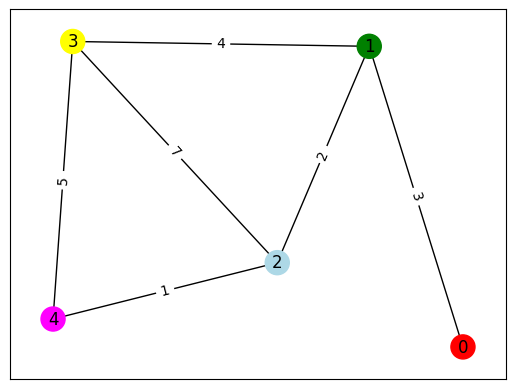

In [ ]:
import numpy as np
import networkx as nx  # Librería para manejar grafos

# Ejemplo de grafo con 5 nodos
nnodes = 5
G = nx.Graph()
# Añade nodos y aristas
G.add_nodes_from(np.arange(0,nnodes,1))
edges = [(0,1,3),(1,2,2),(1,3,4),(2,4,1),(2,3,7),(3,4,5)]
G.add_weighted_edges_from(edges)

# Mostramos el grafo
layout = nx.random_layout(G,seed=10)
colors = ['red', 'green', 'lightblue', 'yellow', 'magenta']
nx.draw_networkx(G, layout, node_color=colors)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels);

In [ ]:
# Función para obtener la matriz Q
def maxcut_qubo_matrix(G: nx.Graph) -> np.ndarray:
    """
    Construye la matriz Q del problema QUBO correspondiente al MAXCUT
    de un grafo ponderado no dirigido G (NetworkX Graph).

    Parámetros:
    - G: grafo NetworkX con pesos en las aristas (atributo 'weight')

    Retorna:
    - Q: matriz numpy de tamaño n x n, donde n es el número de nodos en G
    """
    n = G.number_of_nodes()
    Q = np.zeros((n, n))

    # G.edges(data=True) devuelve una lista de (v_j,v_i,{'weight': peso})
    for j, i, peso in G.edges(data=True):
        w = peso.get('weight', 1.0)  # peso por defecto = 1 si no está definido
        Q[i, i] -= w
        Q[j, j] -= w
        # i es siempre > j
        Q[i, j] += 2 * w

    return Q

In [ ]:
Q = maxcut_qubo_matrix(G)
print(Q)

[[ -3.   0.   0.   0.   0.]
 [  6.  -9.   0.   0.   0.]
 [  0.   4. -10.   0.   0.]
 [  0.   8.  14. -16.   0.]
 [  0.   0.   2.  10.  -6.]]


In [ ]:
# Algoritmo MAXCUT por fuerza bruta
import itertools

def solve_maxcut_bruteforce(Q: np.ndarray):
    """
    Resuelve el problema MAXCUT exactamente por fuerza bruta a partir de la matriz Q del QUBO.

    Parámetros:
    - Q: matriz QUBO (numpy array de tamaño n x n)

    Retorna:
    - x_opt: vector binario óptimo
    - max_cut_value: valor máximo del corte
    """
    n = Q.shape[0]
    max_cut_value = float('-inf')
    x_opt = None

    # Producto cartesiano {0,1}^n
    # Genera todas las tuplas (x_0,..,x_{n-1}) con x_i={0,1}
    for x in itertools.product([0, 1], repeat=n):
        x_vec = np.array(x)
        cut_value = - x_vec @ Q @ x_vec  # recordamos que la QUBO representa -MAXCUT
        if cut_value > max_cut_value:
            max_cut_value = cut_value
            x_opt = x

    return np.array(x_opt), max_cut_value

In [ ]:
corte, peso = solve_maxcut_bruteforce(Q)
print('Solución = ',corte)
print('Peso = ',peso)

Solución =  [0 1 1 0 1]
Peso =  19.0


---
---

<a name="ising"></a>
# **Modelo Ising**

El [_modelo Ising_](https://en.wikipedia.org/wiki/Ising_model) es un modelo matemático usado en física estadística para estudiar el comportamiento de materiales ferromagnéticos.

Este modelo parte de una malla de $n$ partículas y busca minimizar la siguiente función:

$$
H(\textbf{z}) = -\sum_{(i,j) \in E} J_{ij}z_iz_j -\sum_j h_j z_j
$$

donde $z_i = \{-1,1\}$ representa el espín de la partícula $i$, $E$ el conjunto de aristas de la malla, $J_{ij}$ la energía de interacción entre dos partículas y $h_i$ la influencia de un campo magnético externo.

$H(\textbf{z})$ se denomina **función Hamiltoniana** y representa la energía del sistema. Resolver el problema permite obtener la configuración de espines correspondiente a un estado de mínima energía (o estado base).

**Ejemplo**:

<center><img src="https://drive.google.com/uc?export=view&id=1t8ii_V5HKX0sCVPKqgShQQzqTZOcXVxZ" alt="Malla Ising" width="500"  /></center>


En esta malla, suponiendo que $h_i=1, \forall{i}$, el Hamiltoniano resulta:

$$
H(\textbf{z}) = z_0z_1-3z_1z_2+z_2z_3-2z_0z_4+z_1z_5-3z_2z_6-2z_3z_7\\
+z_4z_5+z_5z_6+z_6z_7+z_4z_8-3z_5z_9+z_6z_{10}-z_7z_{11}\\
+z_8z_9-2z_9z_{10}+2z_{10}z_{11}-z_0-z_1-z_2-z_3-z_4-z_5\\
-z_6-z_7-z_8-z_9-z_{10}-z_{11}
$$

con $z_i = \{-1,1\}, \forall i$

Es posible demostrar que cualquier problema QUBO puede expresarse como un modelo Ising de forma simple.

### Expresión mediante operadores cuánticos

Supongamos la siguiente malla simple:

<center><img src="https://drive.google.com/uc?export=view&id=1pHIFMBSBWWciVhG1ll_SAKibigkHOiKz" alt="Malla Ising 3 nodos" width="350"  /></center>

En este caso, suponiendo de nuevo que $h_i=1, \forall{i}$, el problema queda como sigue:

\begin{align*}
\text{Minimizar}\quad & z_1 z_0 - 3z_2z_1 \\
\text{con}\quad & z_i = \{-1,1\}, i = 0,1,2
\end{align*}

Para el operador Pauli-Z, los valores esperados en los estados $|0\rangle$ y $|1\rangle$ son:

$$
\begin{aligned}
\langle 0|Z|0\rangle &= \begin{bmatrix}1 & 0\end{bmatrix}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1\\
\langle 1|Z|1\rangle &= \begin{bmatrix}0 & 1\end{bmatrix}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = -1
\end{aligned}
$$

Por lo tanto, podemos expresar el problema anterior como:

\begin{align*}
\text{Minimizar}\quad & \langle x_1|Z|x_1\rangle \langle x_0|Z|x_0\rangle - 3 \langle x_2|Z|x_2\rangle \langle x_1|Z|x_1\rangle\\
\text{con}\quad & x_i = \{0,1\}, i = 0,1,2
\end{align*}

Supongamos un estado base de un sistema de 3 cúbits, $|x\rangle = |x_2x_1x_0\rangle$ con $x_i = \{0,1\}$.

La propiedad del producto mixto nos permite escribir:

$$
\langle x_1|Z|x_1\rangle \langle x_0|Z|x_0\rangle =
\langle x_2|I|x_2\rangle \langle x_1|Z|x_1\rangle \langle x_0|Z|x_0\rangle =
\langle x_2x_1x_0|I\otimes Z \otimes Z|x_2x_1x_0\rangle = \langle x|Z_1Z_0|x\rangle
$$

donde el operador $Z_i$ actúa sobre el cúbit $i$.

Por lo tanto, el problema anterior se puede expresar como buscar el estado base $|x_\text{min}\rangle$ que minimize la siguiente expresión:

$$
\langle x_\text{min}|Z_1Z_0|x_\text{min}\rangle - 3\langle x_\text{min}|Z_2Z_1|x_\text{min}\rangle = \langle x_\text{min}|Z_1Z_0-3Z_2Z_1|x_\text{min}\rangle
$$

#### Estados arbitrarios

Supongamos en un espacio de $n$ cúbits un estado arbitrario $\vert \psi\rangle = \sum_{i=0}^{2^n-1} a_i\vert i\rangle$. Dado $l,m$ arbitrarios, tenemos:

$$
\langle \psi\vert Z_lZ_m\vert \psi\rangle =
\left(\sum_{i=0}^{2^n-1} a_i^*\langle i\vert\right) Z_lZ_m\left(\sum_{j=0}^{2^n-1} a_j\vert j\rangle\right) =
\sum_{i=0}^{2^n-1}\sum_{j=0}^{2^n-1} a_i^*a_j\langle i\vert Z_lZ_m\vert j\rangle
$$

Además, para un estado de la base $\vert i\rangle$ se verifica:

$$
Z_jZ_k|i\rangle = \pm|i\rangle
$$

es decir, los estados de la base son autovectores de $Z$ con autovalor $\pm 1$.

Y como $\langle i\vert  j\rangle = 0, \forall i\ne j$, la expresión anterior queda:

$$
\langle \psi\vert Z_lZ_m\vert \psi\rangle = \sum_{i=0}^{2^n-1} |a_i|^2\langle i\vert Z_lZ_m\vert i\rangle \ge \langle x_\text{min}|Z_lZ_m|x_\text{min}\rangle
$$

Es decir, el mínimo siempre se alcanza en uno de los estados base.

#### Generalización

Los términos lineales del modelo Ising se pueden expresar como:

$$
\sum_{j} h_j \langle\psi|Z_j|\psi\rangle
$$

Por lo que resolver el problema Ising es equivalente a **encontrar el estado $\psi$ que minimiza**:

$$
-\sum_{(i,j) \in E} J_{ij}\langle\psi|Z_iZ_j|\psi\rangle -\sum_j h_j \langle\psi|Z_j|\psi\rangle
$$

**Ejemplo**: para la malla Ising de tres nodos encuentra por fuerza bruta el estado de la base $|x_\text{min}\rangle$ que minimiza:

$$
\langle x_\text{min}|Z_1Z_0-3Z_2Z_1|x_\text{min}\rangle
$$



In [ ]:
from qiskit.quantum_info import Pauli, SparsePauliOp

n = 3

# Definimos el operador hamiltoniano
Z1Z0 = Pauli('IZZ')
Z2Z1 = Pauli('ZZI')

operador = SparsePauliOp(Z1Z0)-3*SparsePauliOp(Z2Z1)

# Otra forma (los 1s son los coeficientes)
# operador = SparsePauliOp.from_list([('IZZ',1), ('ZZI',-3)])

print(operador)


SparsePauliOp(['IZZ', 'ZZI'],
              coeffs=[ 1.+0.j, -3.+0.j])


In [ ]:
from qiskit.quantum_info import Statevector

# Creamos una lista con todos los estados base para n cúbits

estados = [Statevector.from_int(i, dims=2**n) for i in range(2**n)]

for i in range(2**n):
  print('Estado ',i, 'valor esperado=',estados[i].expectation_value(operador).real)

Estado  0 valor esperado= -2.0
Estado  1 valor esperado= -4.0
Estado  2 valor esperado= 2.0
Estado  3 valor esperado= 4.0
Estado  4 valor esperado= 4.0
Estado  5 valor esperado= 2.0
Estado  6 valor esperado= -4.0
Estado  7 valor esperado= -2.0


Los estados $|001\rangle$ y $|110\rangle$ obtienen el valor esperado mínimo (-4).

Esos estados corresponde a $z_1=z_2=\pm 1$ y $z_0\ne z_1$

## Equivalencia QUBO $\leftrightarrow$ Ising

Es fácil comprobar que es posible convertir un problema QUBO, con $x_i\in \{0,1\}$, en un problema Ising, con $x_i \in \{-1,1\}, y viceversa, con un simple cambio de variables:

$$
z_i = 1 - 2x_i =
\begin{cases}
1, \text{si } x_i = 0 \\
-1, \text{si } x_i = 1
\end{cases}
$$



### **Ejercicio 1**


<center><img src="https://drive.google.com/uc?export=view&id=1t37PWgnsVWRkX16wcbmFSPZNZ1D0dUOS" alt="Ejemplo MAX-CUT" width="700"  /></center>

Para el grafo de la imagen, expresa el algoritmo MAXCUT en formato Ising y resuelvelo usando Qiskit.

**Solución**


Vimos que el MAXCUT expresado como QUBO equivale a minimizar $f(x)$:

$$
f(x) = -\sum_{(i,j) \in E} w_{ij} (x_i + x_j - 2 x_i x_j)
$$

Si reemplazamos $x_i = \frac{1-z_i}{2}$ tenemos:

$$
x_i + x_j - 2 x_i x_j = \frac{1-z_i}{2} + \frac{1-z_j}{2} - 2\frac{1-z_i}{2}\frac{1-z_j}{2} = \frac{1}{2} (2-z_i-z_j -1+z_i+z_j-z_iz_j) = \frac{1}{2} - \frac{z_iz_j}{2}
$$

Por lo tanto, la función a minimizar es:

$$
f(x) = \sum_{(i,j) \in E} \left(-\frac{w_{ij}}{2} + \frac{w_{ij}}{2}z_iz_j\right)
$$

Dado que se trata de una operación de minimización, podemos prescindir del término independiente